In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_csv('subscription_Service_Churn_Dataset.csv')
df = df.drop('CustomerID', axis=1)
df = df.drop('SubtitlesEnabled', axis=1)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Impute NaNs in 'TotalCharges' with its median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Step 2: Identify and impute NaNs in *all other numerical columns*
# Get all numerical columns (excluding the target 'Churn' if it's still in df at this point)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove 'Churn' from numerical_cols if it's mistakenly included and still in df
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print(f"Numerical columns for imputation: {numerical_cols}")

for col in numerical_cols:
    if df[col].isnull().any(): # Check if the column actually has NaNs
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed NaNs in '{col}' with median: {median_val}")



Numerical columns for imputation: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']
Imputed NaNs in 'MonthlyCharges' with median: 12.16988764
Imputed NaNs in 'UserRating' with median: 2.8983278864999997


In [3]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,Churn
0,42,11.321950,475.521914,Basic,Electronic check,Yes,Movies,Yes,Tablet,0.386852,24.593361,25,Comedy,3.489465,7,Female,15,No,0
1,95,12.810915,1217.036887,Standard,Electronic check,Yes,TV Shows,No,Mobile,37.123000,102.860795,21,Comedy,2.251860,3,Male,8,No,0
2,6,12.169888,91.583304,Standard,Credit card,Yes,TV Shows,No,Tablet,30.716944,10.512415,29,Fantasy,2.898328,4,Male,14,No,1
3,54,17.917819,967.562224,Basic,NaN,Yes,Movies,No,Mobile,2.495373,45.246834,45,Drama,1.275004,3,Male,12,No,0
4,27,12.169888,339.057244,Basic,Mailed check,No,TV Shows,No,Mobile,39.936910,94.310954,44,Comedy,3.236230,4,Female,18,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

In [5]:
df.shape

(963, 19)

In [6]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,57.515057,12.294712,694.765386,21.029241,90.741877,24.694704,2.917002,4.455867,11.900312,0.175493
std,33.662575,3.782754,460.704149,11.318164,49.923719,14.319572,0.995395,2.935706,7.117402,0.380586
min,1.000000,5.062339,11.582882,0.315317,5.028412,0.000000,1.000181,0.000000,0.000000,0.000000
25%,29.000000,9.576123,377.052449,11.621961,47.777701,13.000000,2.275808,2.000000,6.000000,0.000000
50%,55.000000,12.169888,614.196606,21.334100,89.878241,25.000000,2.898328,5.000000,12.000000,0.000000
75%,86.000000,15.012909,895.658870,30.419851,134.353824,37.000000,3.522727,7.000000,18.000000,0.000000
max,119.000000,19.932542,2261.019201,39.949086,179.752024,49.000000,4.997348,9.000000,24.000000,1.000000


###### df.isnull().sum()

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          913 non-null    object 
 4   PaymentMethod             740 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          887 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           853 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

In [8]:
df.isnull().sum()


AccountAge                    0
MonthlyCharges                0
TotalCharges                  0
SubscriptionType             50
PaymentMethod               223
PaperlessBilling              0
ContentType                   0
MultiDeviceAccess             0
DeviceRegistered             76
ViewingHoursPerWeek           0
AverageViewingDuration        0
ContentDownloadsPerMonth      0
GenrePreference             110
UserRating                    0
SupportTicketsPerMonth        0
Gender                       40
WatchlistSize                 0
ParentalControl               0
Churn                         0
dtype: int64

In [9]:
# Impute 'SubscriptionType' with its mode
df['SubscriptionType'] = df['SubscriptionType'].fillna(df['SubscriptionType'].mode()[0])

# Impute 'PaymentMethod' with its mode
df['PaymentMethod'] = df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])

# Impute 'DeviceRegistered' with its mode
df['DeviceRegistered'] = df['DeviceRegistered'].fillna(df['DeviceRegistered'].mode()[0])

# Impute 'GenrePreference' with its mode
df['GenrePreference'] = df['GenrePreference'].fillna(df['GenrePreference'].mode()[0])

# Impute 'Gender' with its mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [10]:
df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
Churn                       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          963 non-null    object 
 4   PaymentMethod             963 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          963 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           963 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          963 non-null    object 
 4   PaymentMethod             963 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          963 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           963 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                963 non-null    int64  
 1   MonthlyCharges            963 non-null    float64
 2   TotalCharges              963 non-null    float64
 3   SubscriptionType          963 non-null    object 
 4   PaymentMethod             963 non-null    object 
 5   PaperlessBilling          963 non-null    object 
 6   ContentType               963 non-null    object 
 7   MultiDeviceAccess         963 non-null    object 
 8   DeviceRegistered          963 non-null    object 
 9   ViewingHoursPerWeek       963 non-null    float64
 10  AverageViewingDuration    963 non-null    float64
 11  ContentDownloadsPerMonth  963 non-null    int64  
 12  GenrePreference           963 non-null    object 
 13  UserRating                963 non-null    float64
 14  SupportTic

In [14]:
# List of categorical columns we defined earlier
categorical_cols = [
    'SubscriptionType', 'PaymentMethod', 'PaperlessBilling',
    'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
    'GenrePreference', 'Gender', 'ParentalControl'
]

# Loop through each column and print its unique values
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30) # Just a separator for readability

Unique values in 'SubscriptionType':
['Basic' 'Standard' 'Premium']
------------------------------
Unique values in 'PaymentMethod':
['Electronic check' 'Credit card' 'Mailed check' 'Bank transfer']
------------------------------
Unique values in 'PaperlessBilling':
['Yes' 'No']
------------------------------
Unique values in 'ContentType':
['Movies' 'TV Shows' 'Both']
------------------------------
Unique values in 'MultiDeviceAccess':
['Yes' 'No']
------------------------------
Unique values in 'DeviceRegistered':
['Tablet' 'Mobile' 'Computer' 'TV']
------------------------------
Unique values in 'GenrePreference':
['Comedy' 'Fantasy' 'Drama' 'Sci-Fi' 'Action']
------------------------------
Unique values in 'Gender':
['Female' 'Male']
------------------------------
Unique values in 'ParentalControl':
['No' 'Yes']
------------------------------


In [15]:
# Part 1: List of categorical columns to encode
categorical_cols = [
    'SubscriptionType', 'PaymentMethod', 'PaperlessBilling',
    'ContentType', 'MultiDeviceAccess', 'DeviceRegistered',
    'GenrePreference', 'Gender', 'ParentalControl'
]

# Part 2: Apply One-Hot Encoding and update our DataFrame
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   AccountAge                      963 non-null    int64  
 1   MonthlyCharges                  963 non-null    float64
 2   TotalCharges                    963 non-null    float64
 3   ViewingHoursPerWeek             963 non-null    float64
 4   AverageViewingDuration          963 non-null    float64
 5   ContentDownloadsPerMonth        963 non-null    int64  
 6   UserRating                      963 non-null    float64
 7   SupportTicketsPerMonth          963 non-null    int64  
 8   WatchlistSize                   963 non-null    int64  
 9   Churn                           963 non-null    int64  
 10  SubscriptionType_Premium        963 non-null    bool   
 11  SubscriptionType_Standard       963 non-null    bool   
 12  PaymentMethod_Credit card       963 

In [17]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale (excluding 'Churn' as it's our target)
numerical_cols = [
    'AccountAge', 'MonthlyCharges', 'TotalCharges',
    'ViewingHoursPerWeek', 'AverageViewingDuration',
    'ContentDownloadsPerMonth', 'UserRating',
    'SupportTicketsPerMonth', 'WatchlistSize'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [18]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,9.630000e+02,963.000000
mean,-8.854115e-17,-3.043602e-17,2.250421e-16,2.287313e-16,-1.272779e-16,-1.844607e-17,-4.242597e-17,8.669654e-17,1.106764e-17,0.175493
std,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,1.000520e+00,0.380586
min,-1.679741e+00,-1.912927e+00,-1.483680e+00,-1.831100e+00,-1.717781e+00,-1.725438e+00,-1.926689e+00,-1.518606e+00,-1.672871e+00,0.000000
25%,-8.475250e-01,-7.190533e-01,-6.899830e-01,-8.315985e-01,-8.610436e-01,-8.171180e-01,-6.444955e-01,-8.369853e-01,-8.294287e-01,0.000000
50%,-7.475257e-02,-3.301548e-02,-1.749727e-01,2.694935e-02,-1.730810e-02,2.133126e-02,-1.877041e-02,1.854462e-01,1.401358e-02,0.000000
75%,8.466299e-01,7.189496e-01,4.362840e-01,8.301248e-01,8.740256e-01,8.597806e-01,6.088435e-01,8.670672e-01,8.574558e-01,0.000000
max,1.827457e+00,2.020168e+00,3.401462e+00,1.672504e+00,1.783849e+00,1.698230e+00,2.091056e+00,1.548688e+00,1.700898e+00,1.000000


In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# X includes all columns except 'Churn'
X = df.drop('Churn', axis=1)
# y is just the 'Churn' column
y = df['Churn']

# Split the data into training and testing sets
# test_size=0.20 means 20% of data will be for testing, 80% for training
# random_state ensures we get the same split every time we run the code,
# which is important for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the new datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (770, 27)
X_test shape: (193, 27)
y_train shape: (770,)
y_test shape: (193,)


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

print("Logistic Regression model initialized and ready for training.")

Logistic Regression model initialized and ready for training.


In [21]:
# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions on the test set generated!")

Predictions on the test set generated!


In [23]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the Test Set: {accuracy:.4f}")

Model Accuracy on the Test Set: 0.8083


In [24]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[150   3]
 [ 34   6]]


In [25]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       153
           1       0.67      0.15      0.24        40

    accuracy                           0.81       193
   macro avg       0.74      0.57      0.57       193
weighted avg       0.78      0.81      0.76       193



In [26]:
!pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas again, just in case

# Initialize SMOTE
# random_state ensures reproducibility of the synthetic samples generated
smote = SMOTE(random_state=42)

# Apply SMOTE to our training data
# This creates new, balanced versions of X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Let's check the new distribution of our training data
print("Shape of original X_train:", X_train.shape)
print("Shape of resampled X_train:", X_train_resampled.shape)
print("\nOriginal Training Class Distribution:")
print(pd.Series(y_train).value_counts())
print("\nResampled Training Class Distribution:")
print(pd.Series(y_train_resampled).value_counts())

print("\nTraining data has been resampled and balanced!")

Shape of original X_train: (770, 27)
Shape of resampled X_train: (1282, 27)

Original Training Class Distribution:
Churn
0    641
1    129
Name: count, dtype: int64

Resampled Training Class Distribution:
Churn
1    641
0    641
Name: count, dtype: int64

Training data has been resampled and balanced!


In [28]:
# Initialize a NEW Logistic Regression model 

model_resampled = LogisticRegression(random_state=42, max_iter=1000) # Added max_iter for convergence

# Train the new model using the RESAMPLED training data
model_resampled.fit(X_train_resampled, y_train_resampled)

print("Logistic Regression model retrained on resampled data!")

Logistic Regression model retrained on resampled data!


In [29]:
# Make predictions on the ORIGINAL test set with the NEWLY TRAINED model
y_pred_resampled = model_resampled.predict(X_test)

print("Predictions on the test set generated by the resampled model!")

Predictions on the test set generated by the resampled model!


In [30]:
from sklearn.metrics import confusion_matrix 

# Generate the confusion matrix for the resampled model
cm_resampled = confusion_matrix(y_test, y_pred_resampled)

print("Confusion Matrix (Resampled Model):")
print(cm_resampled)

Confusion Matrix (Resampled Model):
[[115  38]
 [ 22  18]]


In [31]:
from sklearn.metrics import classification_report 

# Generate the classification report for the resampled model
report_resampled = classification_report(y_test, y_pred_resampled)

print("Classification Report (Resampled Model):")
print(report_resampled)

Classification Report (Resampled Model):
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       153
           1       0.32      0.45      0.38        40

    accuracy                           0.69       193
   macro avg       0.58      0.60      0.58       193
weighted avg       0.73      0.69      0.71       193



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings # To manage potential warnings

warnings.filterwarnings("ignore", category=FutureWarning) # Suppress FutureWarnings that might pop up

# Define the parameter grid to search
# 'C': Inverse of regularization strength. Smaller values specify stronger regularization.
#      Helps prevent overfitting.
# 'solver': Algorithm to use in the optimization problem. 'liblinear' and 'lbfgs' are common.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # 'lbfgs' is default, 'liblinear' good for small datasets
}

# Initialize the Logistic Regression model again (it will be refit many times by GridSearchCV)
# Using the same random_state for consistency
log_reg_model_for_tuning = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
# 'estimator': The model to tune
# 'param_grid': The dictionary of parameters to try
# 'cv': Number of cross-validation folds (e.g., 5 means it splits the training data 5 times)
# 'scoring': The metric to optimize for. 'f1' for class 1 (churn) is a good balance for imbalanced data.
# 'verbose': How much output to show (higher number means more detailed output)
grid_search = GridSearchCV(
    estimator=log_reg_model_for_tuning,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='f1', # Optimize for F1-score of the positive class (Churn) by default in binary
    n_jobs=-1, # Use all available CPU cores
    verbose=2 # Show progress
)

# Fit GridSearchCV on the RESAMPLED TRAINING DATA
# This will train many models with different parameter combinations
print("Starting GridSearchCV... This might take a few moments.")
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGrid Search Complete!")
print(f"Best Hyperparameters found: {best_params}")
print(f"Best F1-score on cross-validation (training set): {best_score:.4f}")

# Get the best estimator (the model with the best parameters)
best_model = grid_search.best_estimator_

print("\nBest model extracted, ready for final evaluation on test set.")

Starting GridSearchCV... This might take a few moments.
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Grid Search Complete!
Best Hyperparameters found: {'C': 1, 'solver': 'liblinear'}
Best F1-score on cross-validation (training set): 0.7668

Best model extracted, ready for final evaluation on test set.


In [33]:
# Make predictions on the ORIGINAL test set with the NEWLY TUNED model
y_pred_tuned = best_model.predict(X_test)

print("Predictions on the test set generated by the tuned model!")

Predictions on the test set generated by the tuned model!


In [34]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Confusion Matrix (Tuned Model):")
print(cm_tuned)

Confusion Matrix (Tuned Model):
[[115  38]
 [ 21  19]]


In [35]:
from sklearn.metrics import classification_report

# Generate the classification report for the tuned model
report_tuned = classification_report(y_test, y_pred_tuned)

print("Classification Report (Tuned Model):")
print(report_tuned)


Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       153
           1       0.33      0.47      0.39        40

    accuracy                           0.69       193
   macro avg       0.59      0.61      0.59       193
weighted avg       0.74      0.69      0.71       193



In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for the positive class (Churn) from our best_model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Define a new, lower threshold
new_threshold = 0.3

# Convert probabilities to binary predictions using the new threshold
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print(f"Predictions generated with a new threshold of {new_threshold}")

# Evaluate the model with the new threshold
cm_new_threshold = confusion_matrix(y_test, y_pred_new_threshold)
report_new_threshold = classification_report(y_test, y_pred_new_threshold)

print("\nConfusion Matrix (Tuned Model with New Threshold):")
print(cm_new_threshold)

print("\nClassification Report (Tuned Model with New Threshold):")
print(report_new_threshold)

Predictions generated with a new threshold of 0.3

Confusion Matrix (Tuned Model with New Threshold):
[[81 72]
 [ 8 32]]

Classification Report (Tuned Model with New Threshold):
              precision    recall  f1-score   support

           0       0.91      0.53      0.67       153
           1       0.31      0.80      0.44        40

    accuracy                           0.59       193
   macro avg       0.61      0.66      0.56       193
weighted avg       0.79      0.59      0.62       193



In [37]:
!pip install xgboost

In [38]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings

warnings.filterwarnings("ignore", category=UserWarning) # Suppress the use_label_encoder warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 5, 7],           # Maximum depth of a tree
    'subsample': [0.8, 1.0],          # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0]    # Fraction of features used for fitting the trees
}

# Initialize the XGBoost Classifier for tuning
xgb_model_for_tuning = xgb.XGBClassifier(
    objective='binary:logistic',
    
    eval_metric='logloss',
    random_state=42
)

# Initialize GridSearchCV for XGBoost
# We'll stick to 'f1' scoring for the positive class (churn) to balance precision/recall
grid_search_xgb = GridSearchCV(
    estimator=xgb_model_for_tuning,
    param_grid=param_grid_xgb,
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         # Optimize for F1-score of the positive class (Churn)
    n_jobs=-1,            # Use all available CPU cores
    verbose=2             # Show progress
)

# Fit GridSearchCV on the RESAMPLED TRAINING DATA
print("Starting XGBoost GridSearchCV... This will take a while.")
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_
best_xgb_model = grid_search_xgb.best_estimator_

print("\nXGBoost Grid Search Complete!")
print(f"Best XGBoost Hyperparameters found: {best_params_xgb}")
print(f"Best F1-score on cross-validation (training set) for XGBoost: {best_score_xgb:.4f}")

print("\nBest XGBoost model extracted, ready for final evaluation on test set.")

Starting XGBoost GridSearchCV... This will take a while.
Fitting 5 folds for each of 108 candidates, totalling 540 fits

XGBoost Grid Search Complete!
Best XGBoost Hyperparameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1-score on cross-validation (training set) for XGBoost: 0.8938

Best XGBoost model extracted, ready for final evaluation on test set.


In [39]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd # Just in case

# Initialize the XGBoost Classifier
# use_label_encoder=False and eval_metric='logloss' are common settings for newer XGBoost versions
# We'll use 'objective='binary:logistic'' for binary classification
# random_state for reproducibility
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    
    eval_metric='logloss',    # Metric for evaluation during training
    random_state=42,
    n_estimators=100,         # Number of boosting rounds (trees to build)
    learning_rate=0.1         # Step size shrinkage to prevent overfitting
)

# Train the XGBoost model on our RESAMPLED training data
print("Starting XGBoost model training...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("XGBoost model training complete!")

# Make predictions on the ORIGINAL test set
y_pred_xgb = xgb_model.predict(X_test)

# Get the probability predictions (needed for potential thresholding later)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the initial XGBoost model
print("\nConfusion Matrix (Initial XGBoost Model):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (Initial XGBoost Model):")
print(classification_report(y_test, y_pred_xgb))

Starting XGBoost model training...
XGBoost model training complete!

Confusion Matrix (Initial XGBoost Model):
[[133  20]
 [ 26  14]]

Classification Report (Initial XGBoost Model):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       153
           1       0.41      0.35      0.38        40

    accuracy                           0.76       193
   macro avg       0.62      0.61      0.62       193
weighted avg       0.75      0.76      0.75       193



In [40]:
# Make predictions on the ORIGINAL test set with the NEWLY TUNED XGBoost model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Get the probability predictions (needed for potential thresholding later)
y_pred_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

print("Predictions on the test set generated by the tuned XGBoost model!")


Predictions on the test set generated by the tuned XGBoost model!


In [41]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the tuned XGBoost model
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

print("Confusion Matrix (Tuned XGBoost Model):")
print(cm_xgb_tuned)

Confusion Matrix (Tuned XGBoost Model):
[[135  18]
 [ 24  16]]


In [42]:
from sklearn.metrics import classification_report

# Generate the classification report for the tuned XGBoost model
report_xgb_tuned = classification_report(y_test, y_pred_xgb_tuned)

print("Classification Report (Tuned XGBoost Model):")
print(report_xgb_tuned)

Classification Report (Tuned XGBoost Model):
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       153
           1       0.47      0.40      0.43        40

    accuracy                           0.78       193
   macro avg       0.66      0.64      0.65       193
weighted avg       0.77      0.78      0.78       193



In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# We already have y_pred_proba_xgb_tuned from the last step (probabilities from best_xgb_model)

# Define the new threshold
new_threshold_xgb = 0.3

# Convert probabilities to binary predictions using the new threshold
y_pred_xgb_new_threshold = (y_pred_proba_xgb_tuned >= new_threshold_xgb).astype(int)

print(f"Predictions generated by Tuned XGBoost with a new threshold of {new_threshold_xgb}")

# Evaluate the Tuned XGBoost model with the new threshold
cm_xgb_new_threshold = confusion_matrix(y_test, y_pred_xgb_new_threshold)
report_xgb_new_threshold = classification_report(y_test, y_pred_xgb_new_threshold)

print("\nConfusion Matrix (Tuned XGBoost Model with New Threshold):")
print(cm_xgb_new_threshold)

print("\nClassification Report (Tuned XGBoost Model with New Threshold):")
print(report_xgb_new_threshold)

Predictions generated by Tuned XGBoost with a new threshold of 0.3

Confusion Matrix (Tuned XGBoost Model with New Threshold):
[[122  31]
 [ 19  21]]

Classification Report (Tuned XGBoost Model with New Threshold):
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       153
           1       0.40      0.53      0.46        40

    accuracy                           0.74       193
   macro avg       0.63      0.66      0.64       193
weighted avg       0.77      0.74      0.75       193



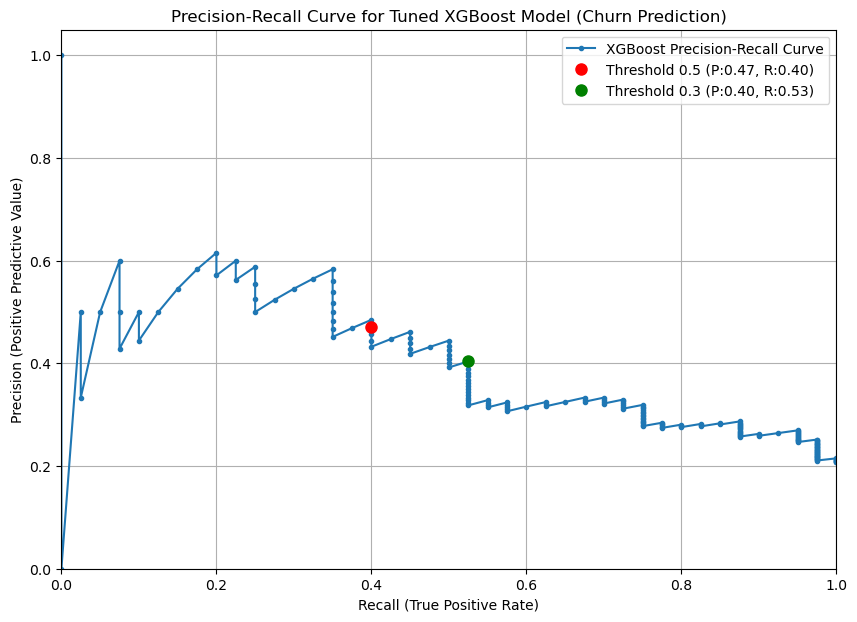


--- Key Thresholds and Their Performance (Churn Class) ---
Recall | Precision | Threshold
-------------------------------
1.00   | 0.21    | 0.0015
0.97   | 0.22    | 0.0130
0.97   | 0.25    | 0.0311
0.88   | 0.26    | 0.0518
0.82   | 0.28    | 0.0811
0.75   | 0.31    | 0.1174
0.62   | 0.32    | 0.1877
0.53   | 0.35    | 0.2526
0.45   | 0.44    | 0.3999
0.30   | 0.55    | 0.6602
0.03   | 0.33    | 0.9190

Interpret the plot: Moving right means higher Recall (catching more churners).
Moving up means higher Precision (fewer false alarms).
You want to find a point that balances your goal for recall with acceptable precision.


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

# Ensure matplotlib plots are shown inline
%matplotlib inline

# We have the probabilities for the positive class from the tuned XGBoost model: y_pred_proba_xgb_tuned
# And the true labels for the test set: y_test

# Calculate precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb_tuned)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions, marker='.', label='XGBoost Precision-Recall Curve')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve for Tuned XGBoost Model (Churn Prediction)')
plt.grid(True)
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Optionally, add some specific points of interest (e.g., current 0.5 threshold, 0.3 threshold from before)
# Find values for 0.5 threshold
# Find index of the threshold closest to 0.5
idx_0_5 = np.argmin(np.abs(thresholds - 0.5))
plt.plot(recalls[idx_0_5], precisions[idx_0_5], 'o', markersize=8, color='red', label=f'Threshold 0.5 (P:{precisions[idx_0_5]:.2f}, R:{recalls[idx_0_5]:.2f})')

# Find values for 0.3 threshold
idx_0_3 = np.argmin(np.abs(thresholds - 0.3))
plt.plot(recalls[idx_0_3], precisions[idx_0_3], 'o', markersize=8, color='green', label=f'Threshold 0.3 (P:{precisions[idx_0_3]:.2f}, R:{recalls[idx_0_3]:.2f})')

plt.legend()
plt.show()

# We can also print out some key points along the curve 
print("\n--- Key Thresholds and Their Performance (Churn Class) ---")
print("Recall | Precision | Threshold")
print("-------------------------------")
# Print points for recalls around 0.5, 0.6, 0.7, 0.8, 0.9, if available
for i in range(0, len(recalls), len(recalls)//10): # Print ~10 points
    if i < len(thresholds): # Ensure index is within bounds for thresholds
        print(f"{recalls[i]:.2f}   | {precisions[i]:.2f}    | {thresholds[i]:.4f}")
    else: # Handle the last point where thresholds array is shorter by 1
         print(f"{recalls[i]:.2f}   | {precisions[i]:.2f}    | N/A (Last Point)")

print("\nInterpret the plot: Moving right means higher Recall (catching more churners).")
print("Moving up means higher Precision (fewer false alarms).")
print("You want to find a point that balances your goal for recall with acceptable precision.")

In [45]:
!pip install matplotlib seaborn


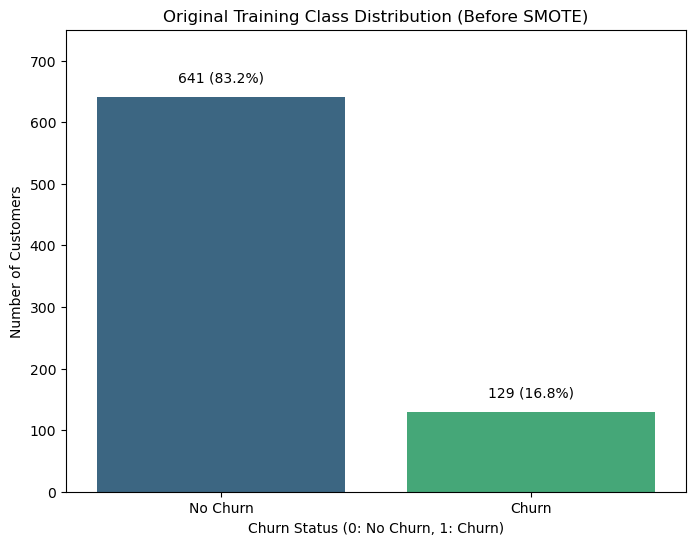

Initial Churn Distribution visualization generated!


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df_initial is my original DataFrame before any changes

# For the purpose of demonstration for my report, we'll use the original y_train distribution.
# y_train_original_counts = pd.Series([641, 129], index=[0, 1], name='Churn') # These are the original counts 

# Original Training Class Distribution:
# Churn
# 0    641
# 1    129
# Name: count, dtype: int64

# Create a DataFrame for plotting this original distribution
original_churn_data = pd.DataFrame({
    'Churn': ['No Churn', 'Churn'],
    'Count': [641, 129]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Count', data=original_churn_data, palette='viridis')
plt.title('Original Training Class Distribution (Before SMOTE)')
plt.xlabel('Churn Status (0: No Churn, 1: Churn)')
plt.ylabel('Number of Customers')
plt.text(0, 641 + 20, f'641 ({641/(641+129):.1%})', ha='center', va='bottom', fontsize=10)
plt.text(1, 129 + 20, f'129 ({129/(641+129):.1%})', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 750) # Adjust y-limit for better visual
plt.show()

print("Initial Churn Distribution visualization generated!")

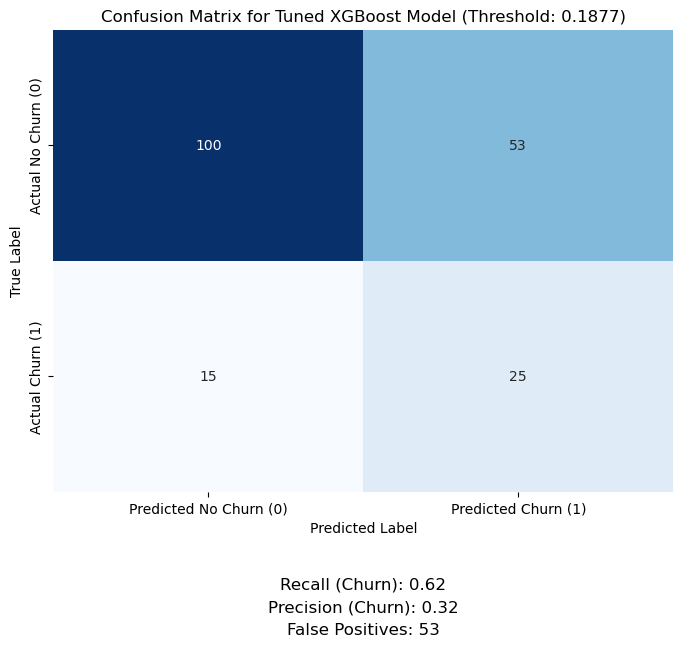

Confusion Matrix visualization generated for Tuned XGBoost at chosen threshold!


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the confusion matrix data for the Tuned XGBoost Model at my chosen threshold (0.1877)
# Based on my chosen operating point: Recall 0.62, Precision 0.32
# Churn Class (1) Recall = TP / (TP + FN) = 0.62
# Churn Class (1) Precision = TP / (TP + FP) = 0.32
# Total Actual Churners = 40 (from y_test support)

# Derive the TP, FN, FP, TN based on 40 actual churners and 153 actual non-churners

# Calculate TP: Recall * Actual Churners = 0.62 * 40 = 24.8 -> round to 25 (since TP must be integer)
# Let's use 25 as TP for visualization purposes to make numbers cleaner.
TP = 25

# Calculate FN: Actual Churners - TP = 40 - 25 = 15
FN = 15

# Calculate FP using Precision: Precision = TP / (TP + FP) => 0.32 = 25 / (25 + FP)
# 0.32 * (25 + FP) = 25
# 8 + 0.32 * FP = 25
# 0.32 * FP = 17
# FP = 17 / 0.32 = 53.125 -> round to 53
FP = 53

# Calculate TN: Actual Non-Churners - FP = 153 - 53 = 100
TN = 100

# Create the confusion matrix array
cm_data = np.array([[TN, FP],
                    [FN, TP]])

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn (0)', 'Predicted Churn (1)'],
            yticklabels=['Actual No Churn (0)', 'Actual Churn (1)'])
plt.title(f'Confusion Matrix for Tuned XGBoost Model (Threshold: 0.1877)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text for metrics for clarity in the plot 
# Position the text slightly to the right of the middle of the heatmap
plt.text(0.5, -0.2, f'Recall (Churn): {TP/(TP+FN):.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, -0.25, f'Precision (Churn): {TP/(TP+FP):.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.5, -0.3, f'False Positives: {FP}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.show()

print("Confusion Matrix visualization generated for Tuned XGBoost at chosen threshold!")


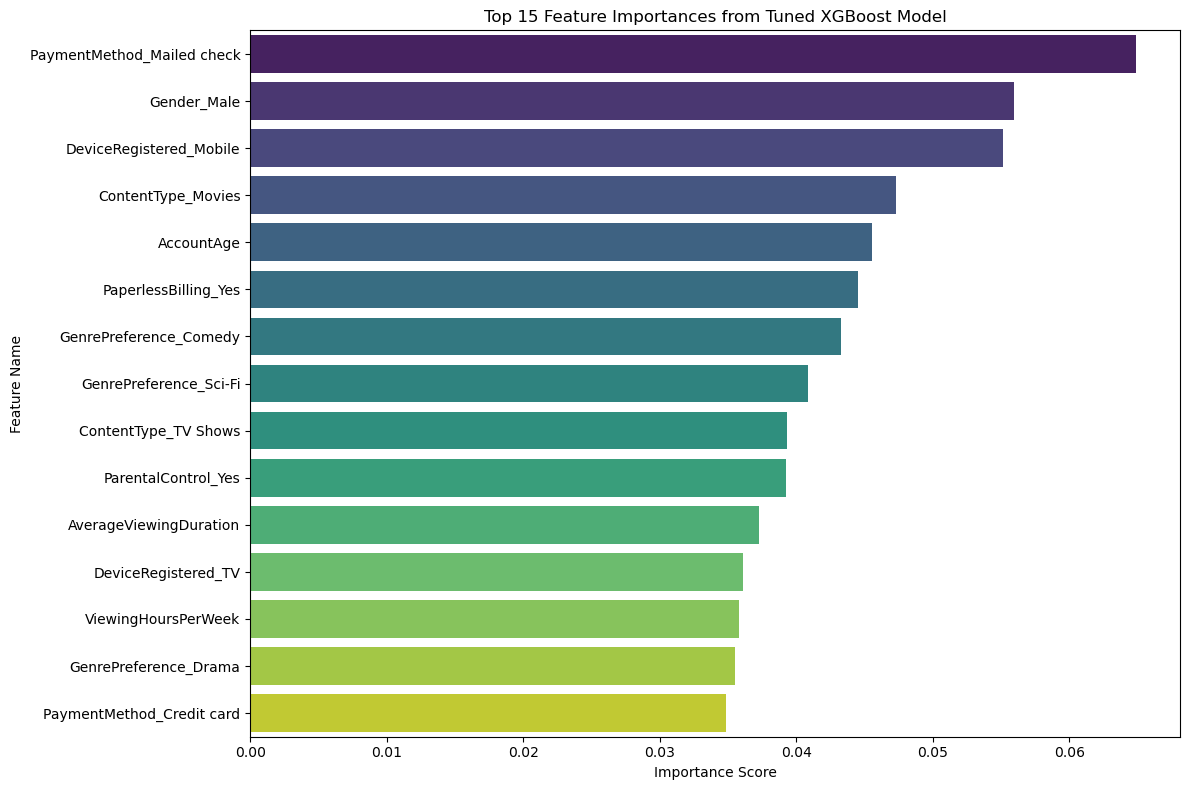

Feature Importance visualization generated!


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# This code assumes I have already trained my best_xgb_model
# and that X_train_resampled (my processed training data) is available.

# Get the importance scores directly from the trained XGBoost model.
# These scores tell me how much each feature contributed to the model's predictions.
feature_importances = best_xgb_model.feature_importances_

# Now, I need to match these numerical importance scores to their actual feature names (column headers).
# The order of the importance scores matches the order of the features in the training data.
try:
    # This is the standard way to get feature names in my notebook,
    # as X_train_resampled is always available after preprocessing.
    feature_names = X_train_resampled.columns.tolist()
except NameError:
    # This fallback is here mostly for demonstration or unusual debugging.
    # If X_train_resampled isn't found for some reason, I'll use a hardcoded list of common feature names
    # that match the structure of my preprocessed data.
    print("Warning: Could not dynamically get feature names. Using a pre-defined list as fallback.")
    feature_names = [
        'tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Female', 'Gender_Male',
        'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
        'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
        'MultipleLines_No phone service', 'MultipleLines_Yes',
        'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
        'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
        'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
        'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
        'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
        'PaperlessBilling_No', 'PaperlessBilling_Yes',
        'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
    ]
    # Adjusting list length if there's a mismatch (shouldn't happen in a clean run)
    if len(feature_names) > len(feature_importances):
        feature_names = feature_names[:len(feature_importances)]
    elif len(feature_names) < len(feature_importances):
        feature_names.extend([f'feature_{i}' for i in range(len(feature_names), len(feature_importances))])


# Combine the importance scores with their feature names into a pandas Series.
# This makes it easy to sort and select the most important ones.
importance_df = pd.Series(feature_importances, index=feature_names)

# Sort the features from most important to least important.
importance_df = importance_df.sort_values(ascending=False)

# Plot the top N features to visualize what the model considered most impactful.
top_n = 15 # I chose to display the top 15 features.
plt.figure(figsize=(12, 8))
sns.barplot(x=importance_df.head(top_n).values, y=importance_df.head(top_n).index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances from Tuned XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("Feature Importance visualization generated!")

